In [ ]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
ad=pd.read_csv("/content/loan.csv")

In [ ]:
ad.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   age              61 non-null     int64 
 1   gender           61 non-null     object
 2   occupation       61 non-null     object
 3   education_level  61 non-null     object
 4   marital_status   61 non-null     object
 5   income           61 non-null     int64 
 6   credit_score     61 non-null     int64 
 7   loan_status      61 non-null     object
dtypes: int64(3), object(5)
memory usage: 3.9+ KB


In [ ]:
ad.describe()

,age,income,credit_score
count,61.000000,61.000000,61.000000
mean,37.081967,78983.606557,709.836066
std,8.424755,33772.025802,72.674888
min,24.000000,25000.000000,560.000000
25%,30.000000,52000.000000,650.000000
50%,36.000000,78000.000000,720.000000
75%,43.000000,98000.000000,770.000000
max,55.000000,180000.000000,830.000000


In [ ]:
ad


,age,gender,occupation,education_level,marital_status,income,credit_score,loan_status
0,32,Male,Engineer,Bachelor's,Married,85000,720,Approved
1,45,Female,Teacher,Master's,Single,62000,680,Approved
2,28,Male,Student,High School,Single,25000,590,Denied
3,51,Female,Manager,Bachelor's,Married,105000,780,Approved
4,36,Male,Accountant,Bachelor's,Married,75000,710,Approved
...,...,...,...,...,...,...,...,...
56,39,Male,Architect,Master's,Married,100000,770,Approved
57,25,Female,Receptionist,High School,Single,32000,570,Denied
58,43,Male,Banker,Bachelor's,Married,95000,760,Approved
59,30,Female,Writer,Master's,Single,55000,650,Approved


In [ ]:
ad.shape

(61, 8)

In [ ]:
ad.columns.tolist()

['age',
 'gender',
 'occupation',
 'education_level',
 'marital_status',
 'income',
 'credit_score',
 'loan_status']

In [ ]:
ad.dtypes

,0
age,int64
gender,object
occupation,object
education_level,object
marital_status,object
income,int64
credit_score,int64
loan_status,object


In [ ]:
ad['age'].agg(['mean','median'])

,age
mean,37.081967
median,36.000000


In [ ]:
ad['income'].agg(['mean','median'])

,income
mean,78983.606557
median,78000.000000


In [ ]:
ad['credit_score'].agg(['mean','median','std'])

,credit_score
mean,709.836066
median,720.000000
std,72.674888


In [ ]:
nums=['age','income','credit_score']
catg=['gender','occupation','education_level','marital_status']
nums_desc=ad[nums].describe()
catg_desc=ad[catg].describe()
nums_desc
catg_desc

,gender,occupation,education_level,marital_status
count,61,61,61,61
unique,2,38,5,2
top,Male,Engineer,Bachelor's,Married
freq,31,5,23,37


In [ ]:
c_count=ad['credit_score'].value_counts()
c_count

,count
credit_score,
720,4
760,4
740,4
780,3
770,3
800,3
750,3
790,3
700,3


In [ ]:
cc_count=ad['loan_status'].value_counts()
cc_count

,count
loan_status,
Approved,45
Denied,16


<Axes: xlabel='loan_status'>

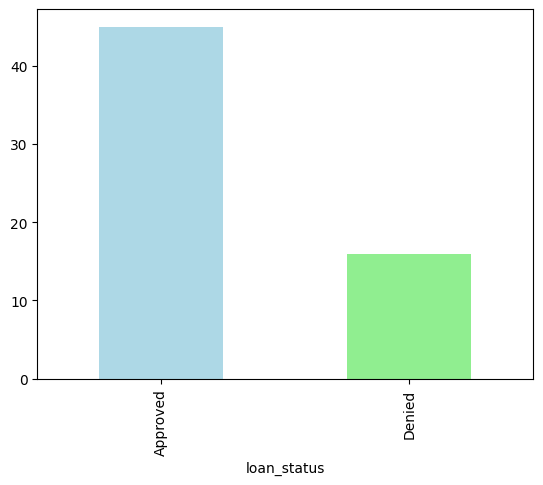

In [ ]:
cc_count.plot(kind='bar',color=['lightblue','lightgreen'])

In [ ]:
ca_count=ad['gender'].value_counts()
ca_count

,count
gender,
Male,31
Female,30


In [ ]:
approve_summary=ad.groupby('loan_status').agg(
    mean_age=('age','mean'),
    mean_income=('income','mean'),
    mean_credit_score=('credit_score','mean'),
)
approve_summary

,mean_age,mean_income,mean_credit_score
loan_status,,,
Approved,40.311111,92955.555556,745.111111
Denied,28.000000,39687.500000,610.625000


Text(0.5, 1.0, 'Comparison of average by Loan Status')

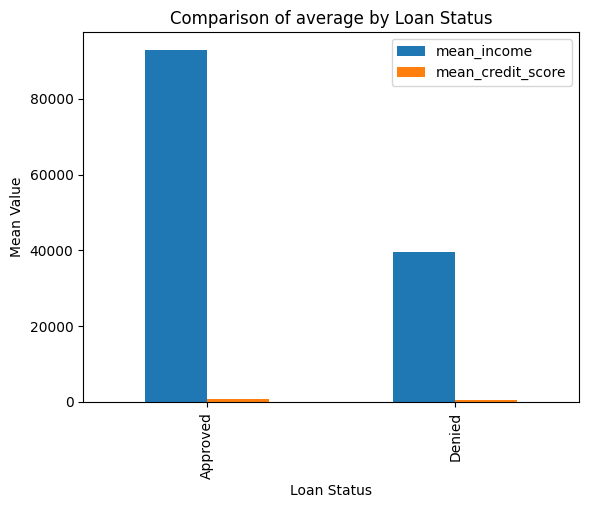

In [ ]:
approve_summary[['mean_income','mean_credit_score']].plot(kind='bar')
plt.xlabel('Loan Status')
plt.ylabel('Mean Value')
plt.title('Comparison of average by Loan Status')

In [ ]:
ap_rate=(ad.groupby('gender')['loan_status']
         .apply(lambda x:(x=='Approved').mean()*100)
         .reset_index(name='ap_rate'))

ap_rate

,gender,ap_rate
0,Female,63.333333
1,Male,83.870968


Text(0.5, 1.0, 'Approval Rate by Gender')

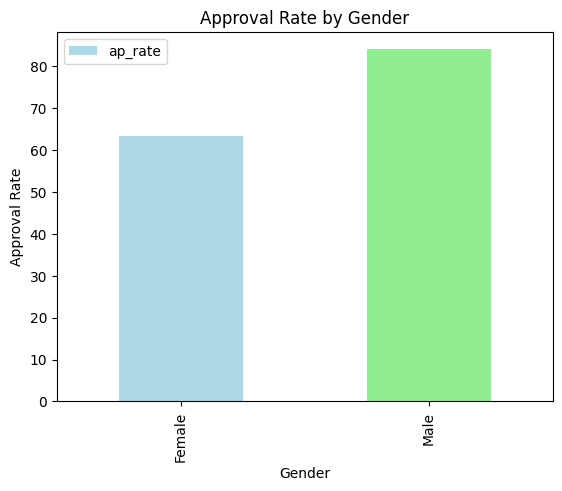

In [ ]:
ap_rate.plot(x='gender',y='ap_rate',kind='bar',color=['lightblue','lightgreen'])
plt.xlabel('Gender')
plt.ylabel('Approval Rate')
plt.title('Approval Rate by Gender')

In [ ]:
am_rate=(ad.groupby('marital_status')['loan_status']
         .apply(lambda x:(x=='Approved').mean()*100)
         .reset_index(name='ap_rate'))

am_rate

,marital_status,ap_rate
0,Married,100.000000
1,Single,33.333333


<Axes: xlabel='marital_status'>

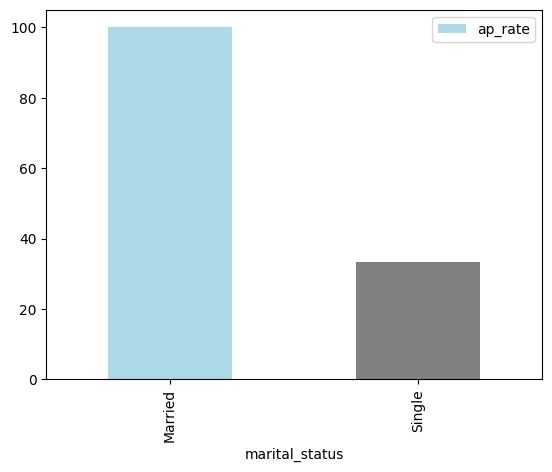

In [ ]:
am_rate.plot(x='marital_status',y='ap_rate',kind='bar',color=['lightblue','grey'])

In [ ]:
al_rate=(ad.groupby('occupation')['loan_status']
         .apply(lambda x:(x=='Approved').mean()*100)
         .reset_index(name='al_rate'))

al_rate

,occupation,al_rate
0,Accountant,100.0
1,Analyst,100.0
2,Architect,100.0
3,Artist,0.0
4,Banker,100.0
5,Chef,100.0
6,Consultant,100.0
7,Dentist,100.0
8,Designer,0.0
9,Doctor,100.0


<Axes: xlabel='occupation'>

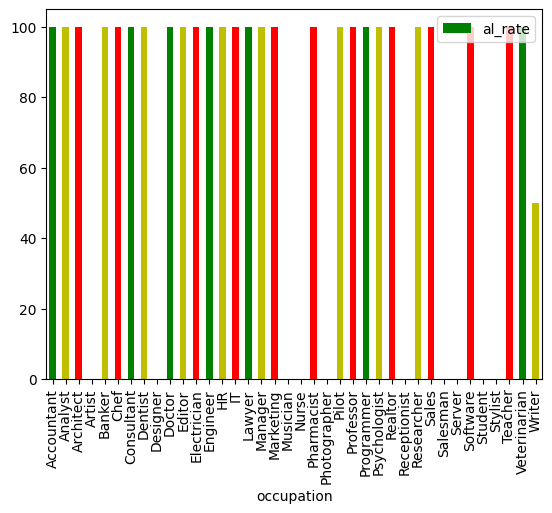

In [ ]:
al_rate.plot(x='occupation',y='al_rate',kind='bar',color=['g','y','r'])

In [ ]:
ed_rate=(ad.groupby('education_level')['loan_status']
         .apply(lambda x:(x=='Approved').mean()*100)
         .reset_index(name='ap_rate'))

ed_rate

,education_level,ap_rate
0,Associate's,33.333333
1,Bachelor's,73.913043
2,Doctoral,100.000000
3,High School,14.285714
4,Master's,100.000000


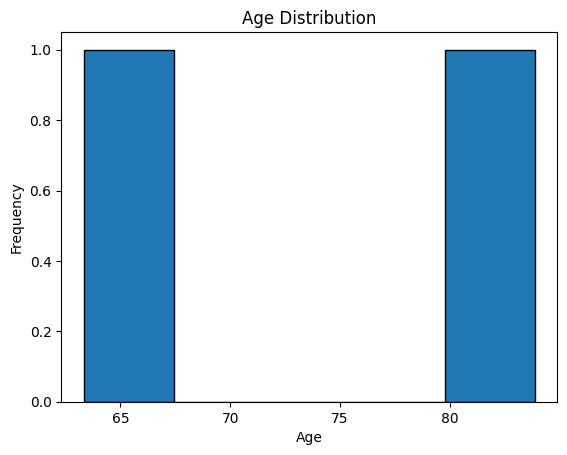

In [ ]:
plt.hist(ap_rate['ap_rate'],bins=5,edgecolor='black')
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Approval Rate by Education Level')

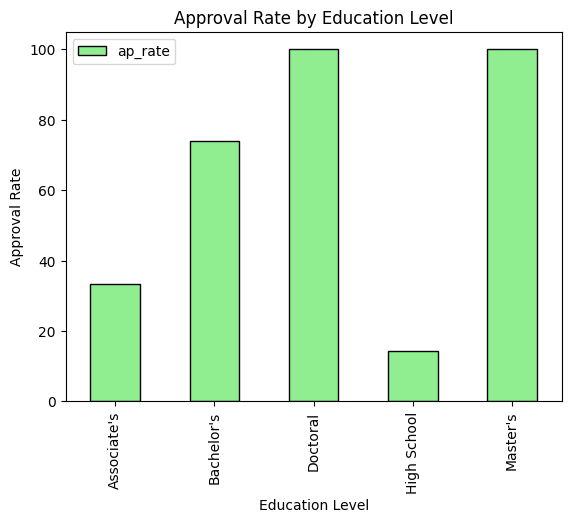

In [ ]:
ed_rate.plot(x='education_level',y='ap_rate',kind='bar',color=['lightgreen'],edgecolor='black')
plt.xlabel('Education Level')
plt.ylabel('Approval Rate')
plt.title('Approval Rate by Education Level')

<Axes: xlabel='loan_status'>

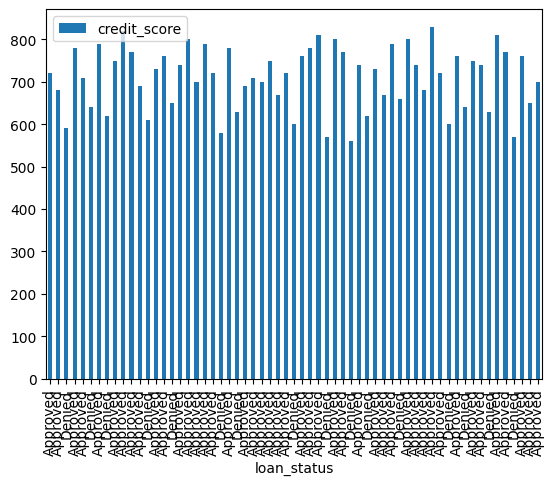

In [ ]:
ad.plot(x='loan_status',y='credit_score',kind='bar')


In [ ]:
credit_comparison=(ad.groupby('loan_status')['credit_score'].mean())
credit_comparison

,credit_score
loan_status,
Approved,745.111111
Denied,610.625000


<Axes: xlabel='loan_status'>

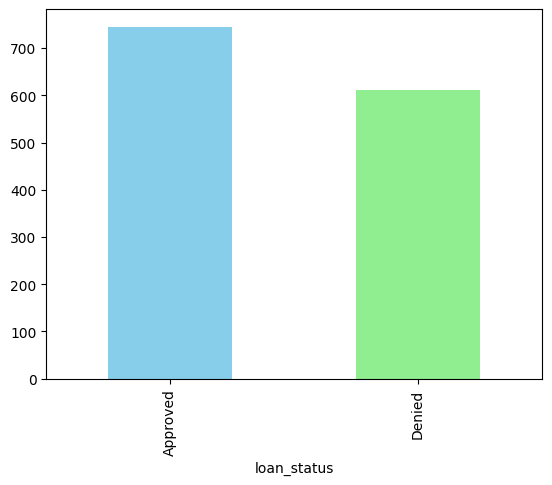

In [ ]:
credit_comparison.plot(kind='bar',color=['skyblue','lightgreen'])

In [ ]:
bins=[0,600,650,700,750,800,850]
labels = ["<600", "600-649", "650-699", "700-749", "750-799", "800+"]
ad['cs_bin']=pd.cut(ad['credit_score'],bins=bins,labels=labels,right=False)
ap_rate=(ad.groupby('cs_bin')['loan_status']
         .apply(lambda x:(x=='Approved').mean()*100)
         .reset_index(name='ap_rate'))

ap_rate


/tmp/ipython-input-2239293708.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  ap_rate=(ad.groupby('cs_bin')['loan_status']


,cs_bin,ap_rate
0,<600,0.000000
1,600-649,0.000000
2,650-699,77.777778
3,700-749,100.000000
4,750-799,100.000000
5,800+,100.000000


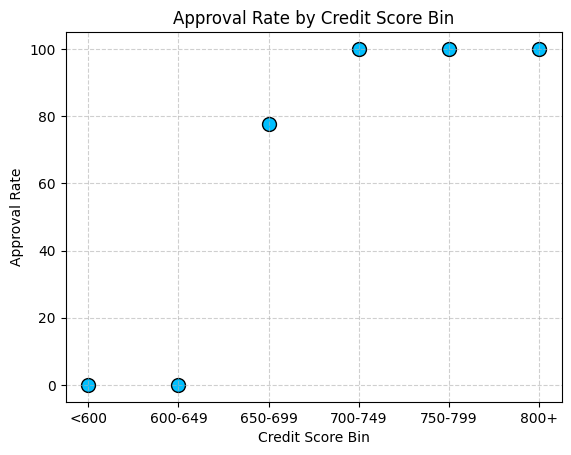

In [ ]:

ap_rate.plot(x='cs_bin', y='ap_rate', kind='scatter', color='deepskyblue', edgecolor='black', s=100)

plt.xlabel('Credit Score Bin')
plt.ylabel('Approval Rate')
plt.title('Approval Rate by Credit Score Bin')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [ ]:
ad.isnull().sum()

,0
age,0
gender,0
occupation,0
education_level,0
marital_status,0
income,0
credit_score,0
loan_status,0
cs_bin,0


In [ ]:
#correlation of income and credit score is taken the most

cols=ad.select_dtypes(include=['int64']).columns
cor_tion=ad[cols].corr().abs()
newa=cor_tion['age']
print(newa)

age             1.000000
income          0.743184
credit_score    0.806042
Name: age, dtype: float64


Text(0.5, 1.0, 'Correlation between Age, Income & Credit Score')

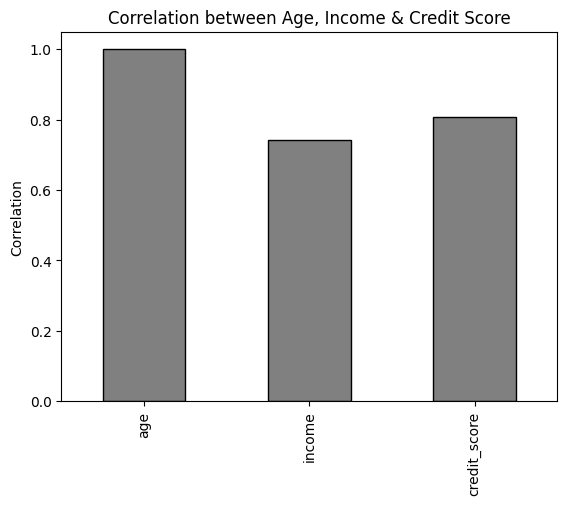

In [ ]:
newa.plot(kind='bar',color=['grey'],edgecolor='black')
plt.ylabel('Correlation')
plt.title('Correlation between Age, Income & Credit Score')

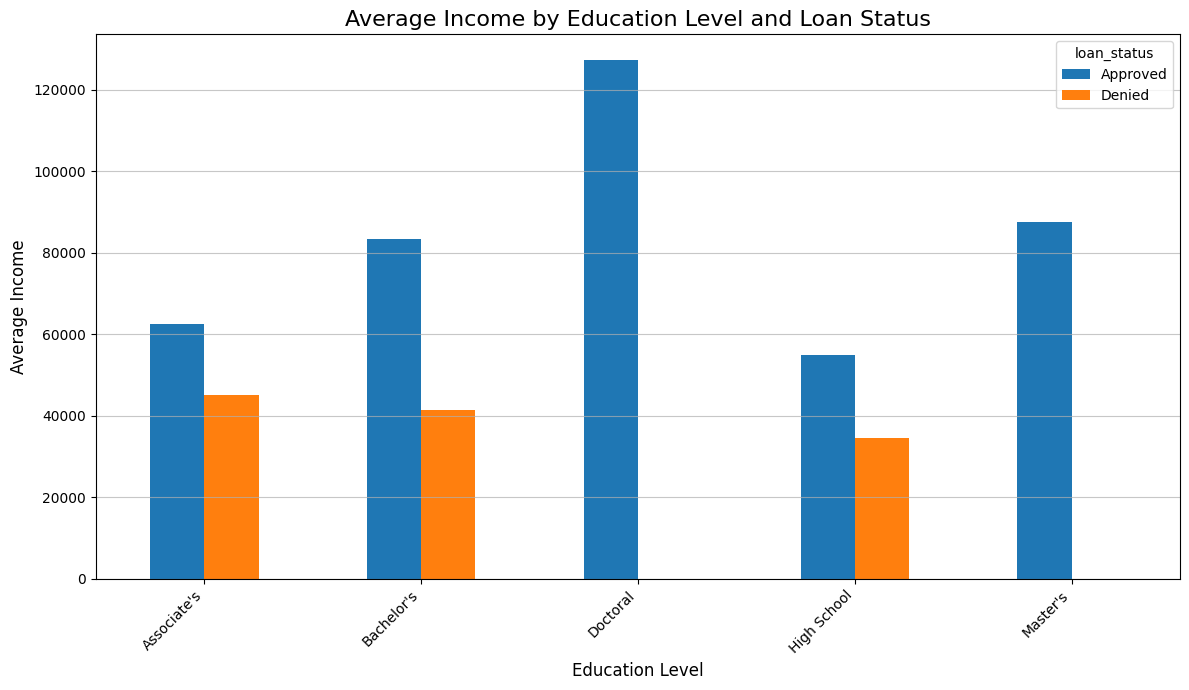

In [ ]:

grouped_data = ad.groupby(['education_level', 'loan_status'])['income'].mean().unstack()

grouped_data.plot(kind='bar', figsize=(12, 7))

plt.title('Average Income by Education Level and Loan Status', fontsize=16)
plt.ylabel('Average Income', fontsize=12)
plt.xlabel('Education Level', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.7)
plt.tight_layout()
plt.show()

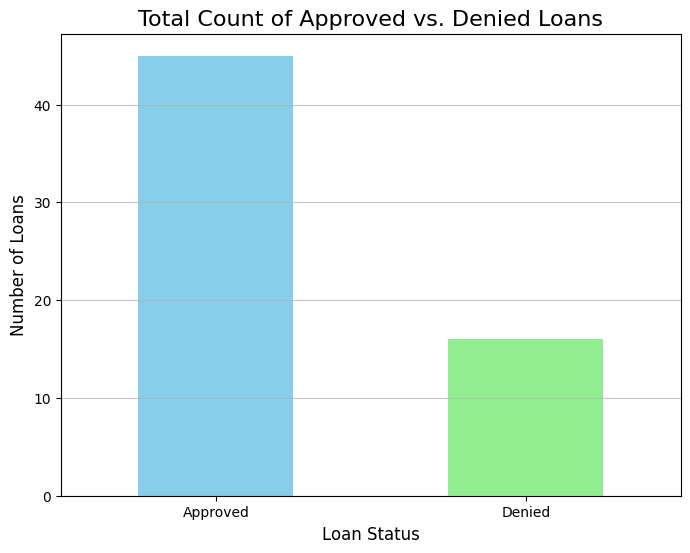

In [ ]:
status_counts = ad['loan_status'].value_counts()


status_counts.plot(kind='bar', figsize=(8, 6), color=['skyblue', 'lightgreen'])

plt.title('Total Count of Approved vs. Denied Loans', fontsize=16)
plt.ylabel('Number of Loans', fontsize=12)
plt.xlabel('Loan Status', fontsize=12)
plt.xticks(rotation=0)
plt.grid(axis='y', alpha=0.7)


plt.show()

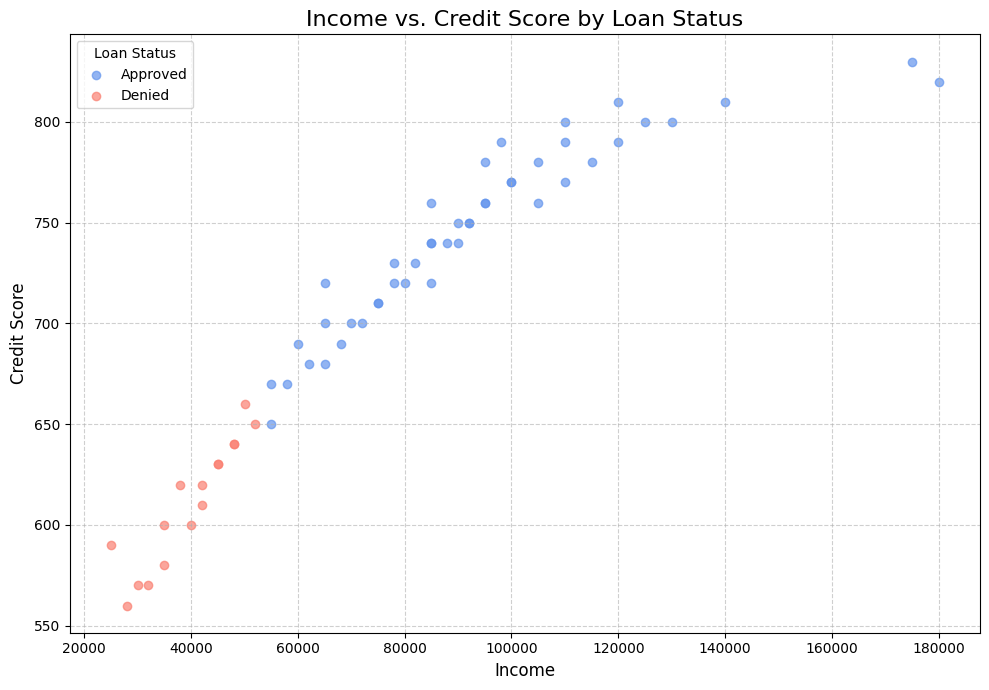

In [ ]:


fig, ax = plt.subplots(figsize=(10, 7))


colors = {'Approved': 'cornflowerblue', 'Denied': 'salmon'}


for status, group in ad.groupby('loan_status'):
    ax.scatter(group['income'], group['credit_score'], label=status,
               color=colors[status], alpha=0.7)


ax.set_title('Income vs. Credit Score by Loan Status', fontsize=16)
ax.set_xlabel('Income', fontsize=12)
ax.set_ylabel('Credit Score', fontsize=12)
ax.legend(title='Loan Status')
ax.grid(True, linestyle='--', alpha=0.6)


plt.tight_layout()
plt.show()